In [1]:
from __future__ import division

import json
from glob import glob
from tqdm import tqdm
import sys, os
import pandas as pd
import scanpy as sc
import scvelo as scv
import numpy as np
import scipy
from scipy import stats
import itertools
import warnings
from collections import OrderedDict 
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import cosine_similarity as cosine_similarity_sklearn

#plotting
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

Global seed set to 0
/gstore/home/melocars/.conda/envs/mambapy38/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/gstore/home/melocars/.conda/envs/mambapy38/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
sys.path.append("../utils/")
import utils as utils

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Plotting style
sc.settings.set_figure_params(dpi=120, fontsize=10, dpi_save=300, frameon=False, format='pdf')
sc.settings.verbosity = 0
sns.set_style(style="white")
sns.set_style("ticks")

In [5]:
out_files = {}

out_files = {'IP_RW': 'data/IP_RWvel.h5ad',
             'IP_N2': 'data/IP_N2vel.h5ad'}

# Process for velocity

In [6]:
adatas = {}

for el in out_files:
    if os.path.exists(out_files[el]):
        print("Loading files")
        adatas[el] = sc.read_h5ad(out_files[el])
    else:
        split_by = "concise_annotation"
        adata = sc.read_h5ad("data/IP.proc.myeloid.h5ad.h5ad")
        adatas[el] = adata[adata.obs[split_by]==el]
        adatas[el] = utils.basic_proc_for_velocity(adatas[el])
        adatas[el].write(out_files[el])


Loading files
Loading files


# Supplemental figure 3a

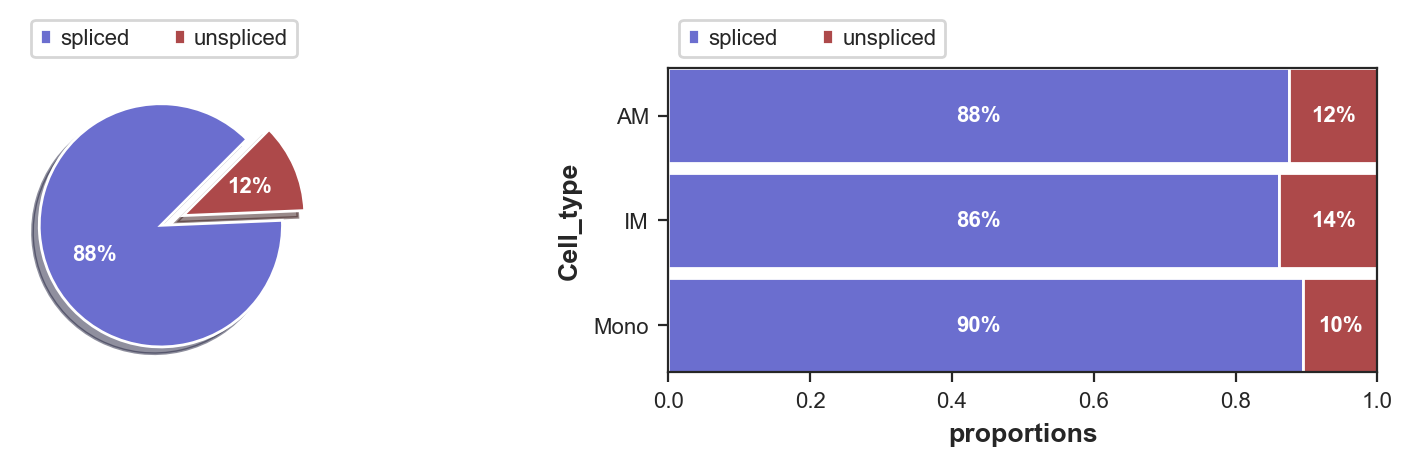

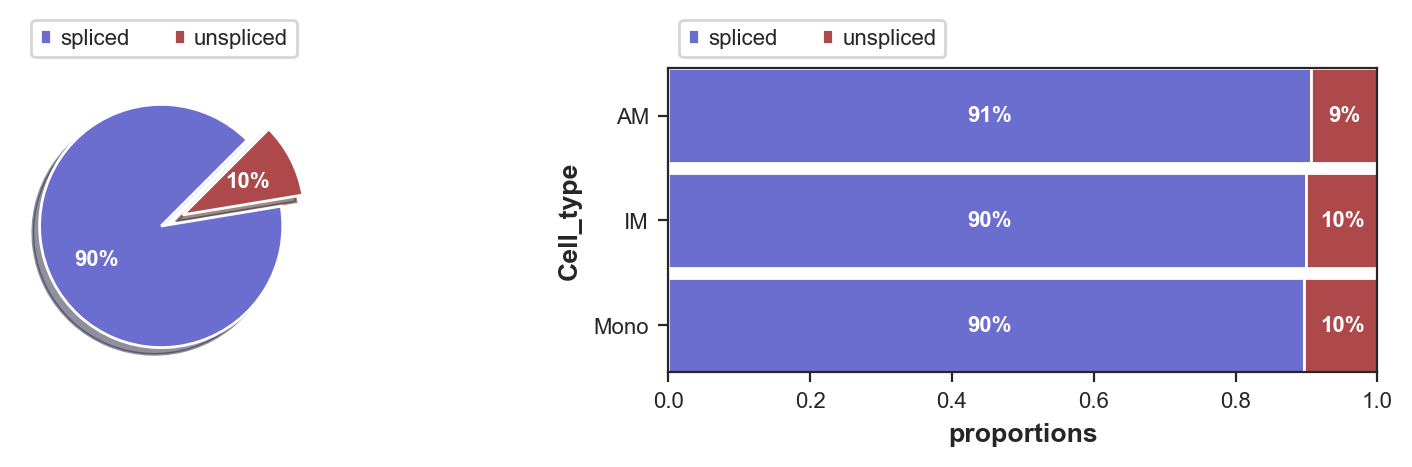

In [7]:
for el in adatas:
    scv.pl.proportions(adatas[el], groupby='Cell_type', layers=['spliced', 'unspliced'])

# Figure 3b

computing velocity embedding
    finished (0:00:04) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:05) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


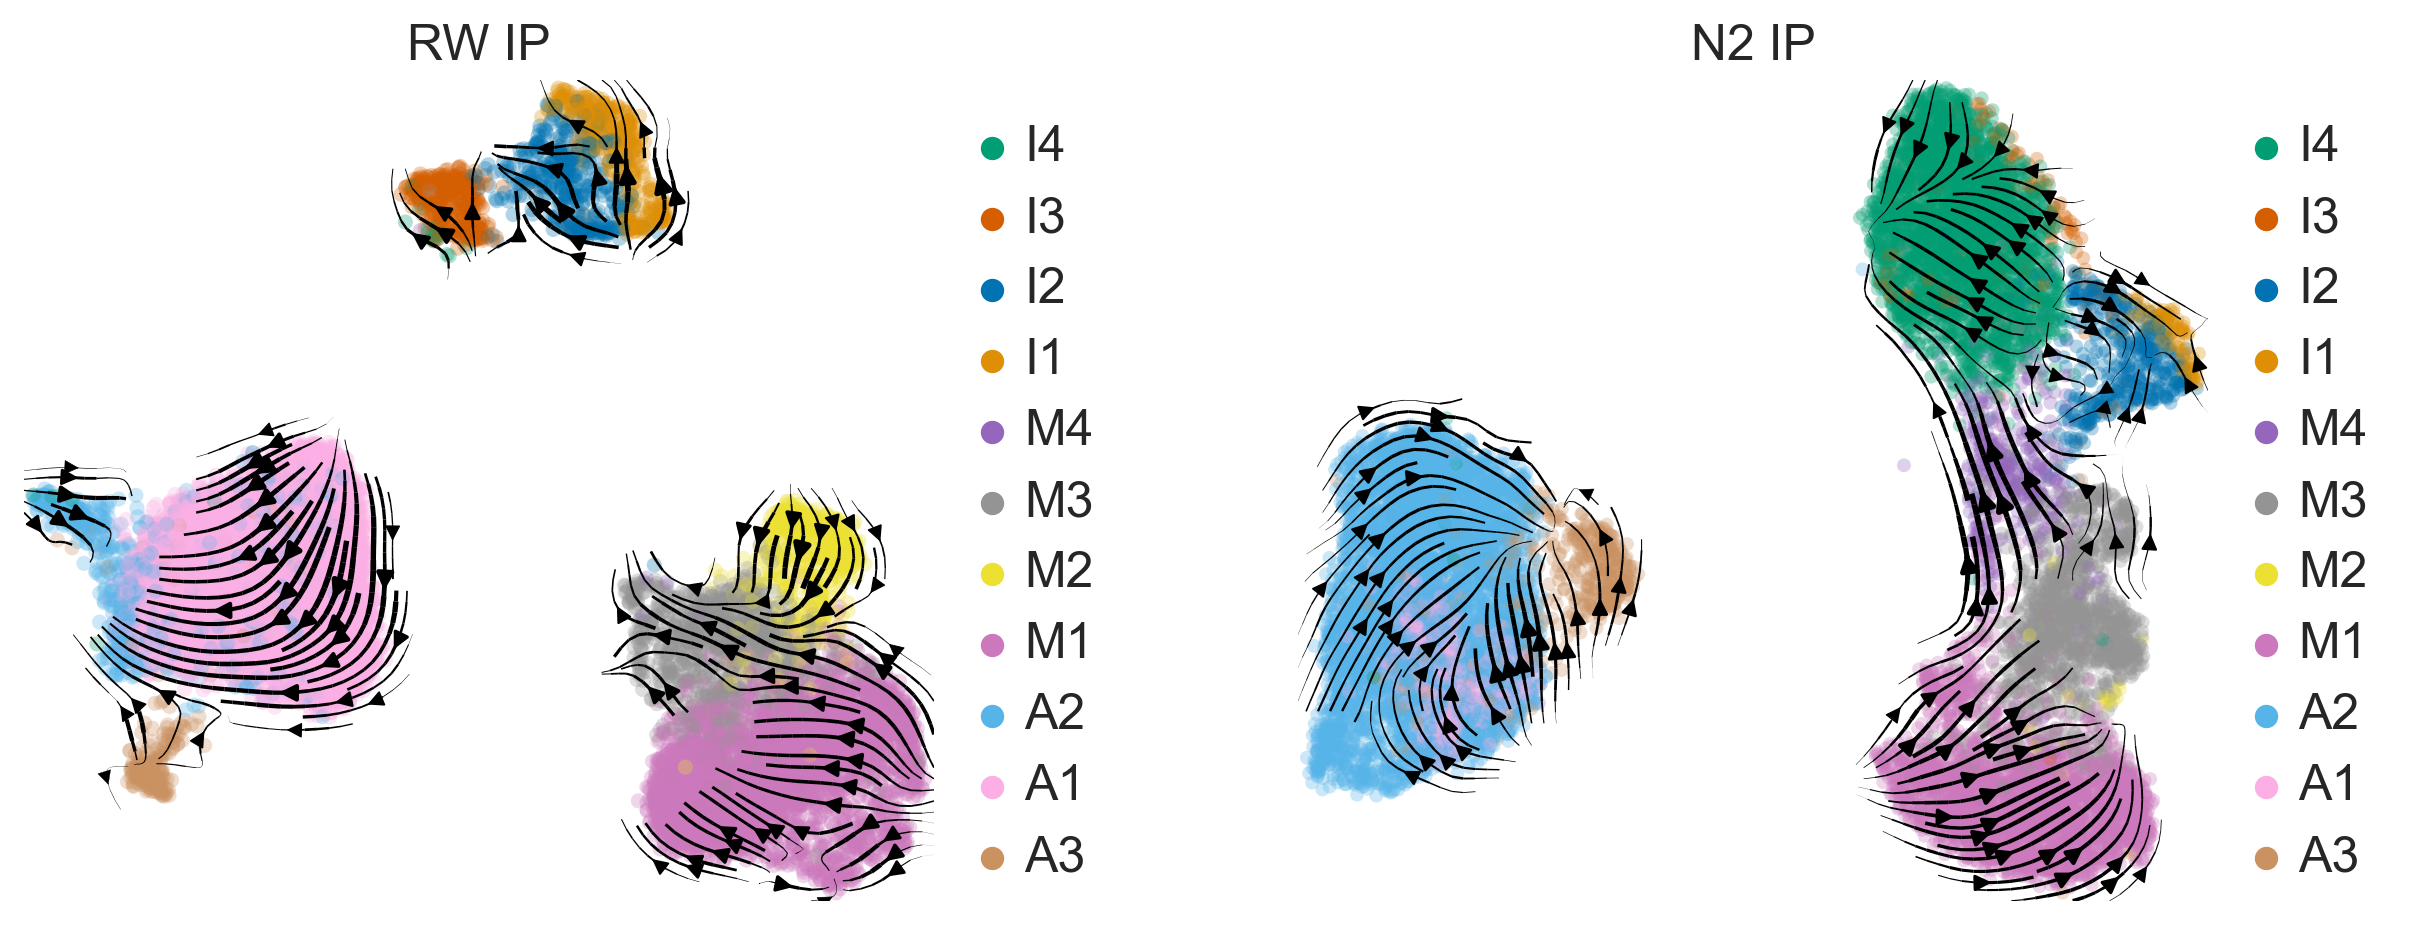

In [8]:
with plt.rc_context({"figure.figsize": (10, 5), "font.size" : 15}):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
    scv.pl.velocity_embedding_stream(adatas['IP_RW'], color='combined_clusters', title='RW IP', density=2.5, show=False, 
                                     legend_loc='upper right', legend_fontsize=15, ax=ax1)
    scv.pl.velocity_embedding_stream(adatas['IP_N2'], color='combined_clusters', title='N2 IP', density=2.5, show=False, 
                                     legend_loc='upper right', legend_fontsize=15, ax=ax2)
    f.subplots_adjust(wspace=0.4, left=0.05)

# Supplemental figure 3b

In [9]:
del adatas['IP_N2'].uns['Cell_type_colors']
del adatas['IP_RW'].uns['Cell_type_colors']

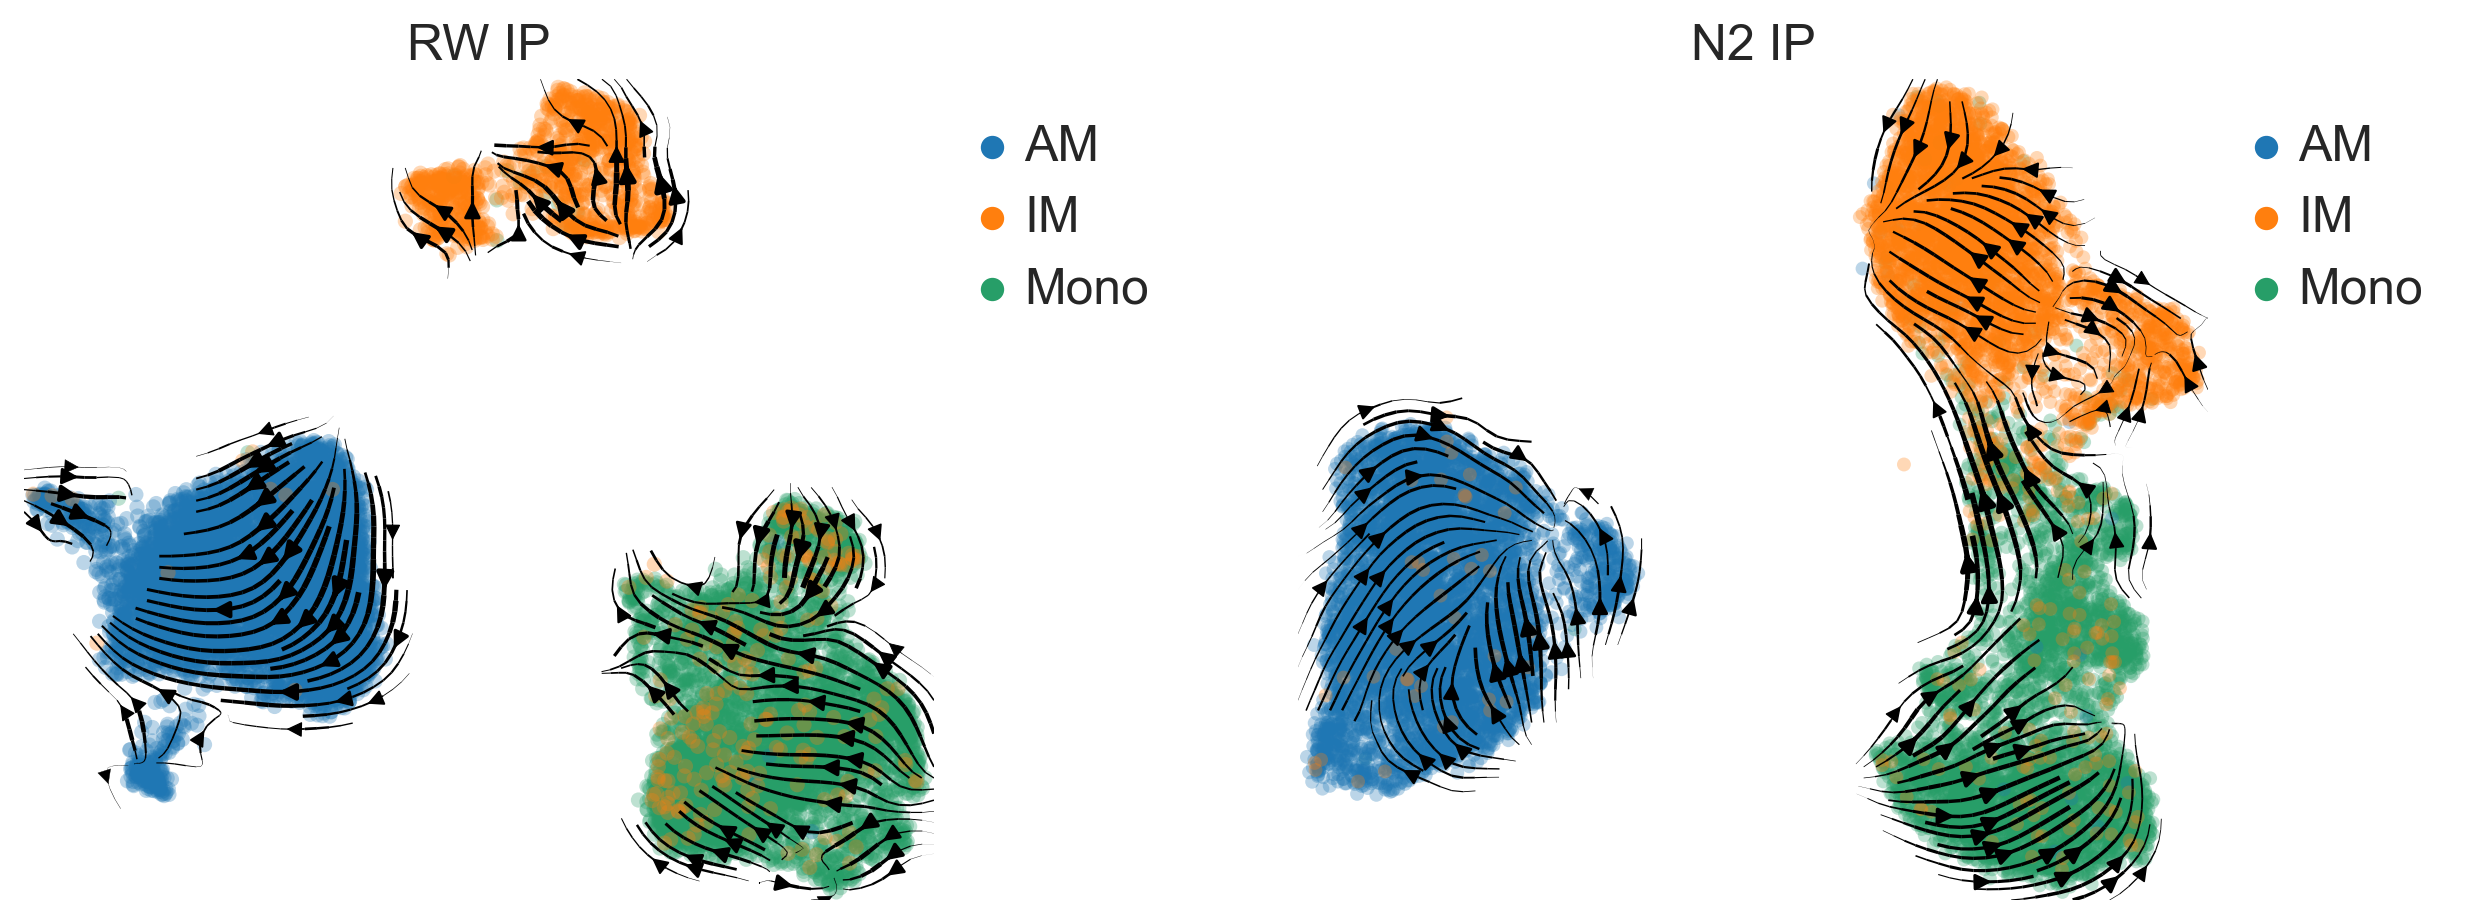

In [10]:
with plt.rc_context({"figure.figsize": (10, 5), "font.size" : 15}):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
    scv.pl.velocity_embedding_stream(adatas['IP_RW'], color='Cell_type', title='RW IP', density=2.5, show=False, 
                                     legend_loc='upper right', legend_fontsize=15, ax=ax1)
    scv.pl.velocity_embedding_stream(adatas['IP_N2'], color='Cell_type', title='N2 IP', density=2.5, show=False, 
                                     legend_loc='upper right', legend_fontsize=15, ax=ax2)
    f.subplots_adjust(wspace=0.4, left=0.05)

# Figure 3a

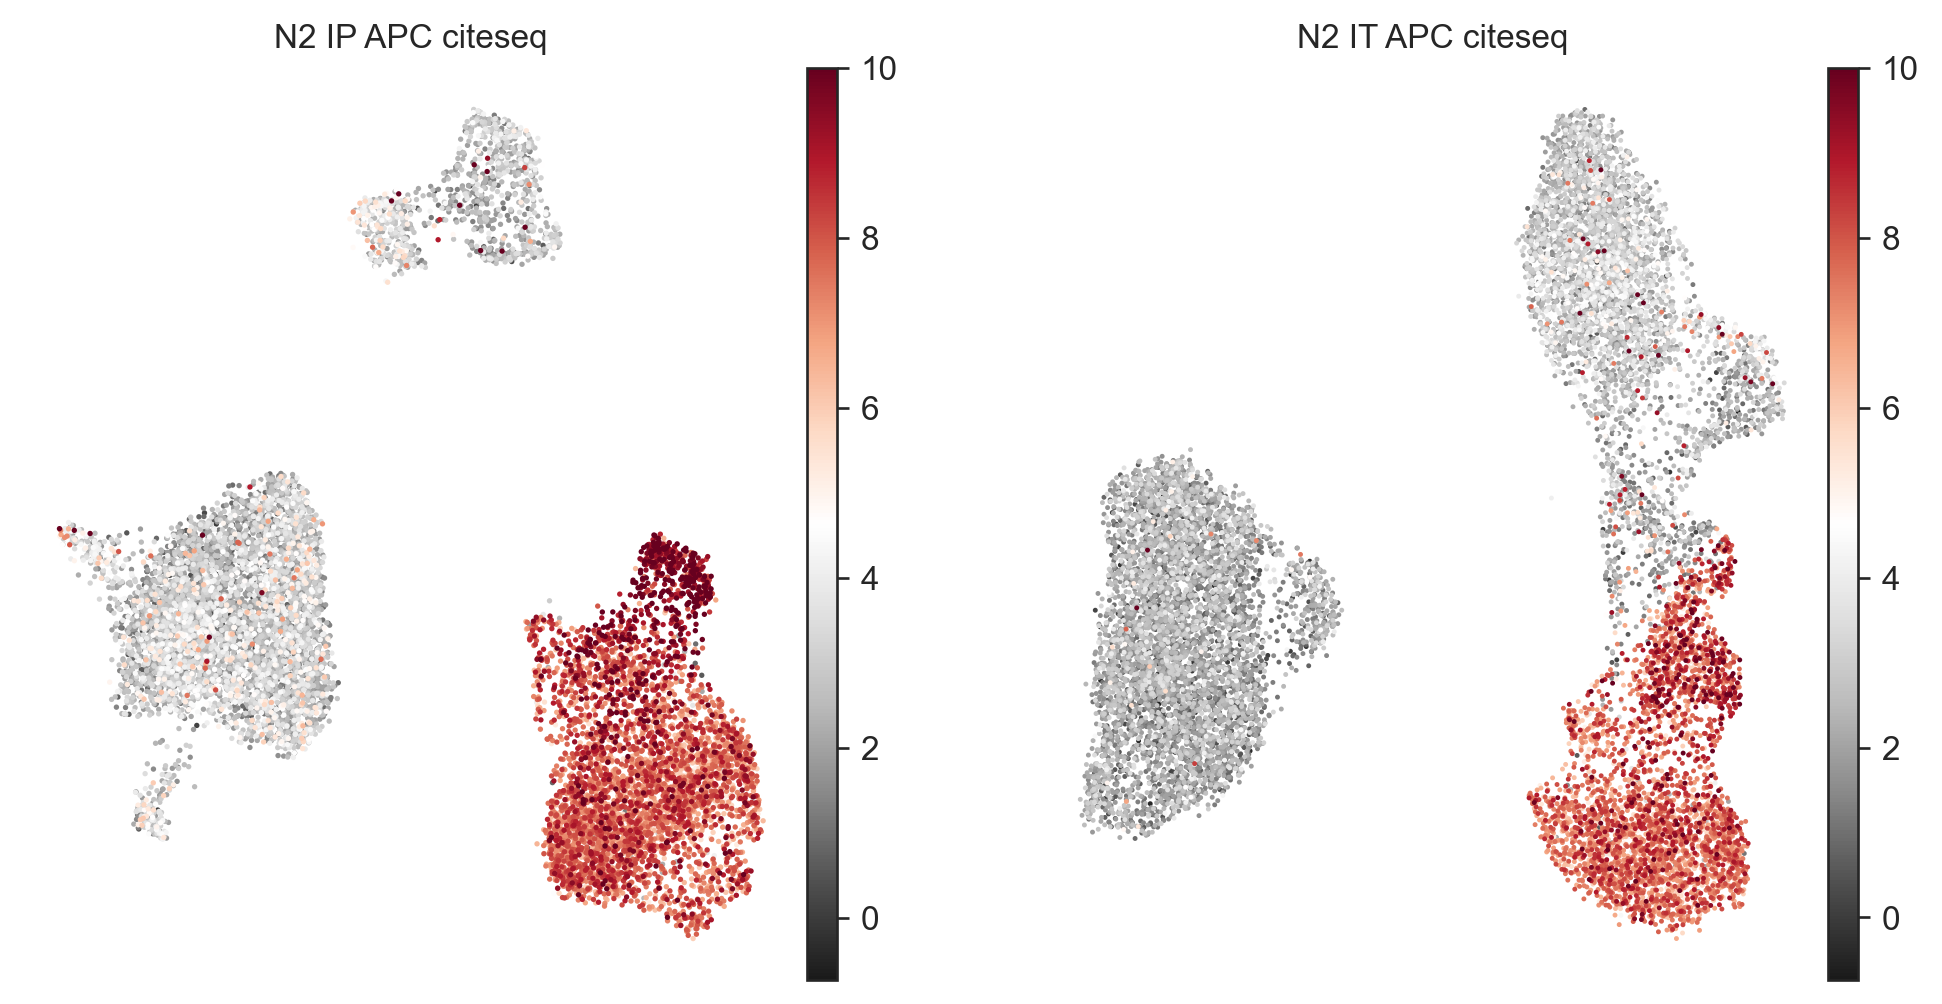

In [11]:
with plt.rc_context({"figure.figsize": (10, 5)}):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    sc.pl.embedding(adatas['IP_RW'], color='APC_prot', title='N2 IP APC citeseq', basis='X_umap', cmap='RdGy_r', vmax=10, show=False, ax=ax1)
    sc.pl.embedding(adatas['IP_N2'], color='APC_prot', title='N2 IT APC citeseq', basis='X_umap', cmap='RdGy_r', vmax=10, show=False, ax=ax2)